In [29]:
# import libraries

import pandas as pd
import math
import random
import csv
import matplotlib.pyplot as plt
%matplotlib inline 

In [30]:
# Load csv of US state capitol airport locations

airports = pd.read_csv('airports.csv', sep=',')

In [31]:
airports['n/s'].replace('N',1.0,inplace=True)
airports['n/s'].replace('S',-1.0,inplace=True)
airports['e/w'].replace('E',1.0,inplace=True)
airports['e/w'].replace('W',-1.0,inplace=True)

In [32]:
def coor_to_radians(degrees,minutes,seconds,hem):
    return (degrees + minutes/60.0 + seconds/3600.0)*hem*math.pi/180 

In [33]:
# Convert coordinates to radians for each airport

airports['latitude'] = coor_to_radians(airports['lat_deg'],airports['lat_min'],airports['lat_sec'],airports['n/s'])
airports['longitude'] = coor_to_radians(airports['lon_deg'],airports['lon_min'],airports['lon_sec'],airports['e/w'])

In [34]:
# Haversine function converts coordinates to cacluate great circle distance.  Radius of Earch is 3959 miles

def haversine(phi1,lambda1,phi2,lambda2):
    return 2*3959.0*math.asin(math.sqrt(hav(phi2-phi1)+math.cos(phi1)*math.cos(phi2)*hav(lambda2-lambda1)))

In [35]:
def hav(theta):
    return (1.0 - math.cos(theta))/2.0

In [36]:
# Create list of indexes and randomly shuffle list

tour = list(airports.index)
random.shuffle(tour)

In [37]:
# Calculate initial distance of randomly suffled tour

distance = 0.0
for i in range(len(tour)-1):
    distance += haversine(airports['latitude'][tour[i]],airports['longitude'][tour[i]],
                          airports['latitude'][tour[i+1]],airports['longitude'][tour[i+1]])
    
    distance += haversine(airports['latitude'][tour[len(tour)-1]],airports['longitude'][tour[len(tour)-1]],
                          airports['latitude'][tour[0]],airports['longitude'][tour[0]])

print('Length of initial tour: %d miles' %distance)
for t in tour:
    print("%s, %s" % (airports['city'][t],airports['state'][t]))
print("%s, %s" % (airports['city'][tour[0]],airports['state'][tour[0]]))

Length of initial tour: 118026 miles
Hartford, CT
Lincoln, NE
Columbus, OH
Dover, DE
Denver, CO
Helena, MT
Nashville, TN
Oklahoma City, OK
Concord, NH
Cheyenne, WY
Salt Lake City, UT
Boston, MA
Raleigh, NC
Indianapolis, IN
Charleston, WV
Augusta, ME
Washington, DC
Providence, RI
Baltimore, MD
Montgomery, AL
Reno, NV
Lansing, MI
Austin, TX
Harrisburg, PA
Lexington, KY
Santa Fe, NM
Tallahassee, FL
Columbia, SC
Montpelier, VT
Richmond, VA
Honolulu, HI
Pierre, SD
Atlanta, GA
Salem, OR
Springfield, IL
Sacramento, CA
Des Moines, IA
Jefferson, MO
Boise, ID
Bismarck, ND
Juneau, AK
Phoenix, AZ
Madison, WI
Jackson, MS
Albany, NY
Olympia, WA
Topeka, KS
Trenton, NJ
Saint Paul, MN
Baton Rouge, LA
Little Rock, AR
Hartford, CT


In [43]:
# Simulated Annealing

temp = open('temp.csv','w')
dist = open('distance.csv','w')

# counter counts number of iterations, T is initial temperature, 
# cooling_rate is the cooling rate, T_stop is final temperature to end loop
counter = 1
T = 0.1
cooling_rate = .99999
c = tour
T_stop = 0.001

while T > T_stop:
    
    dist.write("%d, %f\n" % (counter,distance))
    temp.write("%d, %f\n" % (counter,T))
        
    d = 0.0

# Randomly switch two airports on tour list
    
    a = random.randint(0,len(tour)-1)
    b = random.randint(0,len(tour)-1)
    c[b],c[a] = c[a],c[b]
    
    for i in range(len(c)-1):
        d += haversine(airports['latitude'][c[i]],airports['longitude'][c[i]],
                          airports['latitude'][c[i+1]],airports['longitude'][c[i+1]])
    
    d += haversine(airports['latitude'][c[len(c)-1]],airports['longitude'][c[len(c)-1]],
                          airports['latitude'][c[0]],airports['longitude'][c[0]])
    
# Accept new tour if shorter undconditionally    
    if d < distance:
        tour = c
        distance = d
# Annealling function
# If exp(-cost/temperature) is greater than some random number, accept new tour.  
    else: 
        Cost = (d-distance)/distance
        P = math.exp(-Cost/T)
        R = random.random()
        if P > R:
            tour = c
            distance = d
# Otherwise, undo changes and try again
        else: c[b],c[a] = c[a],c[b]

# Cool and update counter    
    T = T*cooling_rate
    counter += 1
    
temp.close()
dist.close()

In [44]:
t = pd.read_csv('temp.csv',sep=',',header=None)
cooling = pd.read_csv('distance.csv',sep=',',header=None)

Text(0.5,1,'Temperature Coooling')

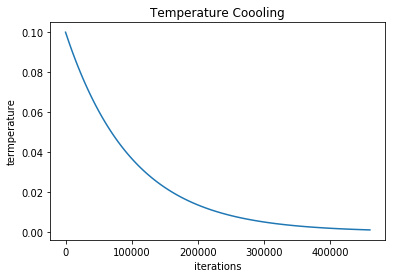

In [45]:
plt.plot(t[0],t[1])
plt.xlabel('iterations')
plt.ylabel('termperature')
plt.title('Temperature Coooling')

Text(0.5,1,'Distance of Tour')

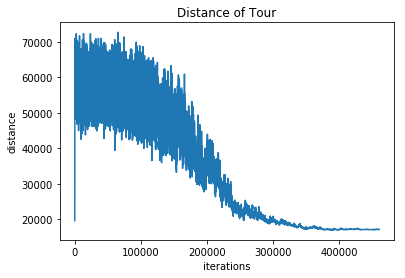

In [46]:
plt.plot(cooling[0],cooling[1])
plt.xlabel('iterations')
plt.ylabel('distance')
plt.title('Distance of Tour')

In [47]:
print('Length of Tour: %d miles' % distance)
for t in tour:
    print("%s, %s" % (airports['city'][t],airports['state'][t]))
print("%s, %s" % (airports['city'][tour[0]],airports['state'][tour[0]]))

Length of Tour: 17144 miles
Charleston, WV
Columbus, OH
Lansing, MI
Madison, WI
Saint Paul, MN
Bismarck, ND
Pierre, SD
Cheyenne, WY
Denver, CO
Helena, MT
Reno, NV
Sacramento, CA
Honolulu, HI
Juneau, AK
Olympia, WA
Salem, OR
Boise, ID
Salt Lake City, UT
Phoenix, AZ
Santa Fe, NM
Oklahoma City, OK
Austin, TX
Baton Rouge, LA
Jackson, MS
Montgomery, AL
Tallahassee, FL
Columbia, SC
Atlanta, GA
Nashville, TN
Little Rock, AR
Jefferson, MO
Topeka, KS
Lincoln, NE
Des Moines, IA
Springfield, IL
Indianapolis, IN
Lexington, KY
Raleigh, NC
Richmond, VA
Washington, DC
Baltimore, MD
Dover, DE
Albany, NY
Montpelier, VT
Concord, NH
Augusta, ME
Boston, MA
Providence, RI
Hartford, CT
Trenton, NJ
Harrisburg, PA
Charleston, WV
